In this notebook, the dataset will be explored and visualized.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
clips_df = pd.read_csv('data/clips.csv', index_col=0)
clips_df.head()

,min_spectro_db,max_spectro_db,filename
0,-37.482680,42.517320,Bossa For The Boss royalty free bossa nova.mp3
1,-31.742554,48.257446,Bossa For The Boss royalty free bossa nova.mp3
2,-31.706871,48.293130,Bossa For The Boss royalty free bossa nova.mp3
3,-37.309578,42.690422,Bossa For The Boss royalty free bossa nova.mp3
4,-35.149307,44.850693,Bossa For The Boss royalty free bossa nova.mp3


In [3]:
metadata_df = pd.read_csv('data/metadata.csv')
metadata_df.head()

,filename,genre,region,country,duration,sample_rate,index_start,index_end
0,Bossa For The Boss royalty free bossa nova.mp3,bossanova,NaN,Brasil,207.082063,48000.0,0.0,19.0
1,Liborio Conti - Bossanova.mp3,bossanova,NaN,Brasil,222.000000,48000.0,20.0,41.0
2,Para Machuchar Meu Coracao.mp3,bossanova,NaN,Brasil,305.806500,48000.0,42.0,71.0
3,Liborio Conti - Salsa.mp3,salsa,NaN,Cuba,170.057370,44100.0,72.0,88.0
4,IR - Eleanor na Run.mp3,irish,NaN,Ireland,199.945964,44100.0,89.0,107.0


In [4]:
# build the audio count dataframe from the clips dataframe column 'filename'
audio_count_df = clips_df['filename'].value_counts().reset_index()
audio_count_df.columns = ['filename', 'clip_count']
audio_count_df.head()

,filename,clip_count
0,Traditional Spanish Flamenco Music Greatest Hi...,234
1,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,106
2,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,67
3,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,64
4,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,46


In [5]:
# now associate each audio with its corresponding metadata
new_metadata_df = pd.merge(audio_count_df, metadata_df, left_on='filename', right_on='filename')
new_metadata_df.head()

,filename,clip_count,genre,region,country,duration,sample_rate,index_start,index_end
0,Traditional Spanish Flamenco Music Greatest Hi...,234,flamenco,NaN,Spain,2348.855854,48000.0,579.0,812.0
1,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,106,japanese,NaN,Japan,1062.779841,44100.0,414.0,519.0
2,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,67,japanese,NaN,Japan,670.603515,44100.0,201.0,267.0
3,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,64,japanese,NaN,Japan,645.055760,44100.0,268.0,331.0
4,JA - Nanae Yoshimura The Art of Koto Vol 1 - ...,46,japanese,NaN,Japan,467.370862,44100.0,332.0,377.0


In [6]:
def plot_bar(dataframe, xlabel, ylabel):
    xdata = dataframe[xlabel]
    ydata = dataframe[ylabel]
    for i in range(len(xdata)):
        plt.bar(xdata[i], ydata[i])
        plt.text(i, ydata[i], ydata[i], ha='center', va='bottom')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    plt.title(f'{ylabel} by {xlabel}')
    plt.show()

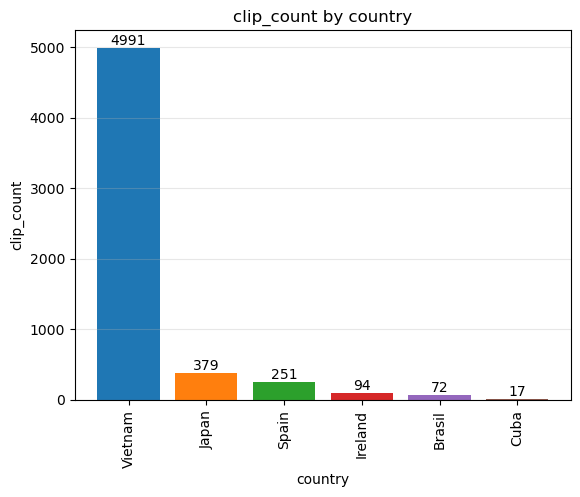

In [7]:
# country clip count (sum of count column)
country_clip_count = new_metadata_df.groupby('country')['clip_count'].sum().reset_index()
country_clip_count = country_clip_count.sort_values('clip_count', ascending=False).reset_index(drop=True)

plot_bar(country_clip_count, 'country', 'clip_count')

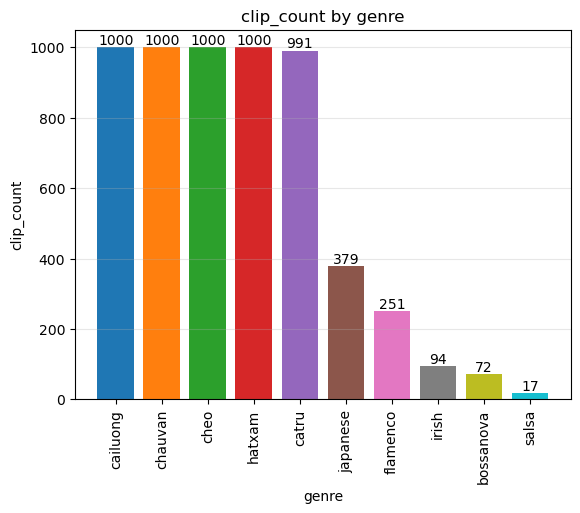

In [8]:
# genre clip count (sum of count column)
genre_clip_count = new_metadata_df.groupby('genre')['clip_count'].sum().reset_index()
genre_clip_count = genre_clip_count.sort_values('clip_count', ascending=False).reset_index(drop=True)

plot_bar(genre_clip_count, 'genre', 'clip_count')